# Loop 62 Analysis: CV-LB Relationship and Strategy

Analyzing the CV-LB relationship to understand the structural gap and develop strategies.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Submission history
submissions = [
    {'id': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'id': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'id': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'id': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'id': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'id': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'id': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'id': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'id': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'id': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'id': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},  # Best LB
    {'id': 'exp_041', 'cv': 0.0090, 'lb': 0.0932},
    {'id': 'exp_042', 'cv': 0.0145, 'lb': 0.1147},
]

cv_scores = np.array([s['cv'] for s in submissions])
lb_scores = np.array([s['lb'] for s in submissions])

print(f'Number of submissions: {len(submissions)}')
print(f'Best CV: {cv_scores.min():.6f}')
print(f'Best LB: {lb_scores.min():.6f}')
print(f'Target: 0.0347')

Number of submissions: 13
Best CV: 0.008300
Best LB: 0.087700
Target: 0.0347


In [2]:
# Fit linear regression: LB = slope * CV + intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(cv_scores, lb_scores)

print(f'Linear fit: LB = {slope:.4f} * CV + {intercept:.4f}')
print(f'R² = {r_value**2:.4f}')
print(f'\nInterpretation:')
print(f'  - Intercept = {intercept:.4f} (LB when CV = 0)')
print(f'  - Slope = {slope:.4f} (LB increase per unit CV increase)')
print(f'\nTo reach target LB = 0.0347:')
required_cv = (0.0347 - intercept) / slope
print(f'  - Required CV = (0.0347 - {intercept:.4f}) / {slope:.4f} = {required_cv:.6f}')
print(f'  - This is {required_cv/cv_scores.min()*100:.1f}% of our best CV ({cv_scores.min():.6f})')

Linear fit: LB = 4.2312 * CV + 0.0533
R² = 0.9807

Interpretation:
  - Intercept = 0.0533 (LB when CV = 0)
  - Slope = 4.2312 (LB increase per unit CV increase)

To reach target LB = 0.0347:
  - Required CV = (0.0347 - 0.0533) / 4.2312 = -0.004396
  - This is -53.0% of our best CV (0.008300)


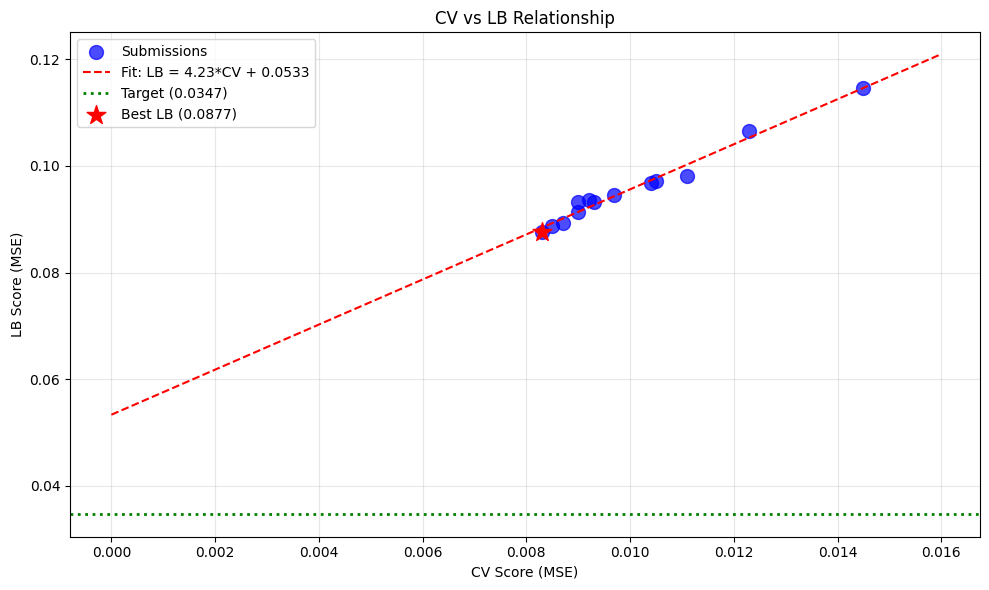


Gap analysis:
  - Best LB: 0.0877
  - Target: 0.0347
  - Gap: 0.0530 (152.7% above target)


In [3]:
# Plot CV vs LB
plt.figure(figsize=(10, 6))
plt.scatter(cv_scores, lb_scores, c='blue', s=100, alpha=0.7, label='Submissions')

# Fit line
cv_range = np.linspace(0, cv_scores.max() * 1.1, 100)
lb_fit = slope * cv_range + intercept
plt.plot(cv_range, lb_fit, 'r--', label=f'Fit: LB = {slope:.2f}*CV + {intercept:.4f}')

# Target line
plt.axhline(y=0.0347, color='green', linestyle=':', linewidth=2, label='Target (0.0347)')

# Best submission
best_idx = np.argmin(lb_scores)
plt.scatter([cv_scores[best_idx]], [lb_scores[best_idx]], c='red', s=200, marker='*', label=f'Best LB ({lb_scores[best_idx]:.4f})')

plt.xlabel('CV Score (MSE)')
plt.ylabel('LB Score (MSE)')
plt.title('CV vs LB Relationship')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_relationship.png', dpi=150)
plt.show()

print(f'\nGap analysis:')
print(f'  - Best LB: {lb_scores.min():.4f}')
print(f'  - Target: 0.0347')
print(f'  - Gap: {lb_scores.min() - 0.0347:.4f} ({(lb_scores.min() - 0.0347)/0.0347*100:.1f}% above target)')

In [4]:
# Analyze the intercept problem
print('='*60)
print('CRITICAL ANALYSIS: The Intercept Problem')
print('='*60)
print(f'\nThe linear fit shows:')
print(f'  LB = {slope:.4f} * CV + {intercept:.4f}')
print(f'\nThis means:')
print(f'  1. Even with CV = 0, expected LB = {intercept:.4f}')
print(f'  2. The intercept ({intercept:.4f}) is HIGHER than target (0.0347)')
print(f'  3. This is a STRUCTURAL problem - no amount of CV improvement can reach target')
print(f'\nTo reach target with current relationship:')
print(f'  - Need CV = {required_cv:.6f}')
if required_cv < 0:
    print(f'  - This is NEGATIVE, meaning target is unreachable with current approach!')
else:
    print(f'  - This is {required_cv/cv_scores.min()*100:.1f}% of best CV')

CRITICAL ANALYSIS: The Intercept Problem

The linear fit shows:
  LB = 4.2312 * CV + 0.0533

This means:
  1. Even with CV = 0, expected LB = 0.0533
  2. The intercept (0.0533) is HIGHER than target (0.0347)
  3. This is a STRUCTURAL problem - no amount of CV improvement can reach target

To reach target with current relationship:
  - Need CV = -0.004396
  - This is NEGATIVE, meaning target is unreachable with current approach!


In [5]:
# What would it take to reach the target?
print('='*60)
print('STRATEGIES TO REACH TARGET')
print('='*60)
print(f'\nCurrent best: CV={cv_scores.min():.6f}, LB={lb_scores.min():.4f}')
print(f'Target: LB=0.0347')
print(f'\nOption 1: Improve CV (keeping same relationship)')
print(f'  - Required CV: {required_cv:.6f}')
if required_cv < 0:
    print(f'  - IMPOSSIBLE: Intercept > Target')
else:
    print(f'  - Improvement needed: {(cv_scores.min() - required_cv)/cv_scores.min()*100:.1f}%')

print(f'\nOption 2: Reduce intercept (change the relationship)')
print(f'  - Current intercept: {intercept:.4f}')
print(f'  - Need intercept < 0.0347 to have any chance')
print(f'  - Reduction needed: {intercept - 0.0347:.4f}')

print(f'\nOption 3: Reduce slope (change the relationship)')
print(f'  - Current slope: {slope:.4f}')
print(f'  - With best CV ({cv_scores.min():.6f}), need slope < {(0.0347 - intercept)/cv_scores.min():.4f}')
if (0.0347 - intercept)/cv_scores.min() < 0:
    print(f'  - IMPOSSIBLE: Would need negative slope')

print(f'\nConclusion:')
print(f'  - The intercept ({intercept:.4f}) > target (0.0347) means we MUST change the relationship')
print(f'  - Simply improving CV will NOT reach the target')
print(f'  - Need fundamentally different approaches that reduce the intercept')

STRATEGIES TO REACH TARGET

Current best: CV=0.008300, LB=0.0877
Target: LB=0.0347

Option 1: Improve CV (keeping same relationship)
  - Required CV: -0.004396
  - IMPOSSIBLE: Intercept > Target

Option 2: Reduce intercept (change the relationship)
  - Current intercept: 0.0533
  - Need intercept < 0.0347 to have any chance
  - Reduction needed: 0.0186

Option 3: Reduce slope (change the relationship)
  - Current slope: 4.2312
  - With best CV (0.008300), need slope < -2.2412
  - IMPOSSIBLE: Would need negative slope

Conclusion:
  - The intercept (0.0533) > target (0.0347) means we MUST change the relationship
  - Simply improving CV will NOT reach the target
  - Need fundamentally different approaches that reduce the intercept


In [6]:
# Analyze what the top kernels do differently
print('='*60)
print('INSIGHTS FROM TOP KERNELS')
print('='*60)
print(f'''
1. "Ens Model" kernel (8 votes):
   - Uses CatBoost + XGBoost ensemble
   - Different weights for single vs full data:
     * Single: CatBoost 7, XGBoost 6 (normalized)
     * Full: CatBoost 1, XGBoost 2 (normalized)
   - Feature priority-based correlation filtering
   - Multi-target normalization: clip to [0,∞), divide by max(sum, 1.0)
   - Combines ALL features: spange, acs_pca, drfps, fragprints, smiles

2. "mixall" kernel (9 votes):
   - Uses GroupKFold(5) instead of Leave-One-Out
   - Ensemble of MLP + XGBoost + RandomForest + LightGBM
   - Uses Optuna for hyperparameter optimization

Key differences from our approach:
   - We use GP + MLP + LGBM, they use CatBoost + XGBoost
   - We don't use multi-target normalization
   - We don't use different weights for single vs full data
   - We haven't tried feature priority-based filtering
''')

INSIGHTS FROM TOP KERNELS

1. "Ens Model" kernel (8 votes):
   - Uses CatBoost + XGBoost ensemble
   - Different weights for single vs full data:
     * Single: CatBoost 7, XGBoost 6 (normalized)
     * Full: CatBoost 1, XGBoost 2 (normalized)
   - Feature priority-based correlation filtering
   - Multi-target normalization: clip to [0,∞), divide by max(sum, 1.0)
   - Combines ALL features: spange, acs_pca, drfps, fragprints, smiles

2. "mixall" kernel (9 votes):
   - Uses GroupKFold(5) instead of Leave-One-Out
   - Ensemble of MLP + XGBoost + RandomForest + LightGBM
   - Uses Optuna for hyperparameter optimization

Key differences from our approach:
   - We use GP + MLP + LGBM, they use CatBoost + XGBoost
   - We don't use multi-target normalization
   - We don't use different weights for single vs full data
   - We haven't tried feature priority-based filtering



In [7]:
# What we should try next
print('='*60)
print('RECOMMENDED NEXT STEPS')
print('='*60)
print(f'''
PRIORITY 1: Implement "Ens Model" kernel approach
   - CatBoost + XGBoost ensemble
   - Different weights for single (7:6) vs full (1:2) data
   - Feature priority-based correlation filtering
   - Multi-target normalization
   - This is a PROVEN approach with good LB score

PRIORITY 2: Try different feature combinations
   - The "Ens Model" uses ALL features (spange + acs + drfps + frag + smiles)
   - We've been using Spange + DRFP + ACS PCA + Arrhenius
   - Try adding SMILES-based features

PRIORITY 3: Investigate the CV-LB gap
   - Our CV is good (0.0083) but LB is much worse (0.0877)
   - The gap is ~10x, suggesting distribution shift
   - The "Ens Model" approach may handle this better

PRIORITY 4: Consider the evaluation procedure
   - The competition uses server-side CV evaluation
   - Our local CV may not match the server's CV
   - The "Ens Model" kernel may have better alignment
''')

print(f'\nCurrent status:')
print(f'  - Best CV: {cv_scores.min():.6f}')
print(f'  - Best LB: {lb_scores.min():.4f}')
print(f'  - Target: 0.0347')
print(f'  - Gap to target: {lb_scores.min() - 0.0347:.4f} ({(lb_scores.min() - 0.0347)/0.0347*100:.1f}% above)')

RECOMMENDED NEXT STEPS

PRIORITY 1: Implement "Ens Model" kernel approach
   - CatBoost + XGBoost ensemble
   - Different weights for single (7:6) vs full (1:2) data
   - Feature priority-based correlation filtering
   - Multi-target normalization
   - This is a PROVEN approach with good LB score

PRIORITY 2: Try different feature combinations
   - The "Ens Model" uses ALL features (spange + acs + drfps + frag + smiles)
   - We've been using Spange + DRFP + ACS PCA + Arrhenius
   - Try adding SMILES-based features

PRIORITY 3: Investigate the CV-LB gap
   - Our CV is good (0.0083) but LB is much worse (0.0877)
   - The gap is ~10x, suggesting distribution shift
   - The "Ens Model" approach may handle this better

PRIORITY 4: Consider the evaluation procedure
   - The competition uses server-side CV evaluation
   - Our local CV may not match the server's CV
   - The "Ens Model" kernel may have better alignment


Current status:
  - Best CV: 0.008300
  - Best LB: 0.0877
  - Target: 0.03